<a href="https://colab.research.google.com/github/wnyngj/class2021fall/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor 시간이 있는 사인 곡선 만들기

In [ ]:
# parameter setting #사인곡선에 시간이 개입 된 것을 그릴 텐
amp = 1          # range [0.0, 1.0] #진폭 최솟값 -1 ~ 최댓값 1
sr = 10000       # sampling rate, Hz 
dur = 0.5        # in seconds     #이 곡선이 끝났을 때 SR은 5000번째임
freq = 100.0     # sine frequency, Hz     
#사인곡선 1CYCLE이 1초에 100번 있음=DUR은 0.5니까 50번
phase = np.pi/2  # phase, radian
#사인곡선의 시작은 0도인데 여기선 90도부터 시작한다는 것

In [ ]:
# generate samples     
 #입력:각도값radian, 출력:SINE의 VALUE 
 #그치만 사인곡선=소리를 나타내는 거면 입력값x에 시간이 들어가야함
 #아래의 코드들은 그 '시간'을 만드는 과정
 #개괄:1st.샘플 인덱스 만들기 2nd.시간 변환 3rd.각도 변환 4th.그 각도를 sine에 넣기
nSamp = sr * dur      #만들 샘플의 개수?=10000*0.5= 5000
samples = np.arange(1, nSamp+1)     #1~5000번째까지 샘플 인덱스(숫자로) 만들기

In [ ]:
# convert samples to time     #이렇게 만든 샘플 인덱스를 시간으로 바꾸기
t = samples/sr      
#시간=샘플 인덱스1~5000/샘플링 레이트10000 
#t = 1/10000 ~~ 5000/10000 

In [ ]:
# convert time to angle in radian   #시간을 각도로 바꾸기
theta0 = t * 2*np.pi * freq     
#ex) 0...1초 * 2pi --> 0...2pi[=한바퀴의 angle(360도)] *freq[=필요한건 freq만큼의 각도]

In [ ]:
# shift angle by phase    #첫 시작 각도를 0도가 아닌 90도로 하고싶다면
theta = theta0 + phase      #0도+90도

In [ ]:
# generate signal by sin-phasor
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

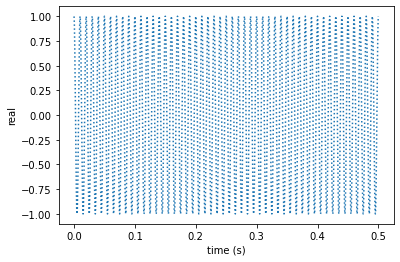

In [ ]:
# plot the entire signal
plt.plot(t, s, ':') #만약 '시간'이 없다면? #plt.plot(theta, s, ':')
plt.xlabel('time (s)') #plt.xlabel('angle (radian)')
plt.ylabel('real')

Text(0, 0.5, 'real')

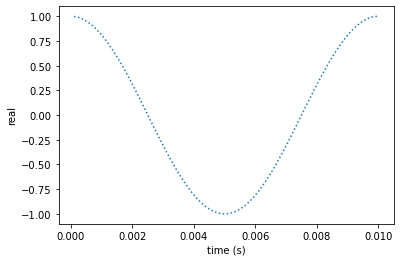

In [ ]:
# plot a certain of signals     #너무 자잘자잘해서 확대해서 보고싶다!
sampleRng = np.arange(0,100)      #100번째까지의 sample arrange 나옴
#100이 아닌5000 넣으면 상단의 그래프 다시 나오겠지
#freq=100 500까지 몇번의 cycle이 나올 것인가?
plt.plot(t[sampleRng], s[sampleRng], ':')     #인덱스에 넣기
plt.xlabel('time (s)')
plt.ylabel('real')

In [ ]:
ipd.Audio(s, rate=10000)      #반드시 sr값 적어줘야 play됨.

In [ ]:
def phasor_sine(amp, sr, dur, freq, phase):     #일련의 phasor를 함수로 만들기
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta      #함수 안에서 만든 변수 세개 리턴하기

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440 #cf)'라'음 ; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)     #1초동안 '라'음

#소리엔 phase값이 영향을 미치지 않음

음표 만들기!

In [ ]:
amp = 1; sr = 10000; phase = 0

A = 440.00
C = 523.25
F = 698.46
D = 587.33
E = 659.25
Eb = 622.25
F = 698.46
G = 783.99
Bb = 932.33

s_all = np.empty(0)

In [ ]:
s, t, theta= phasor_sine(amp, sr, 0.25, F, phase)
s_all = np.concatenate((s_all, s))

### Dividing signal by the window size and step

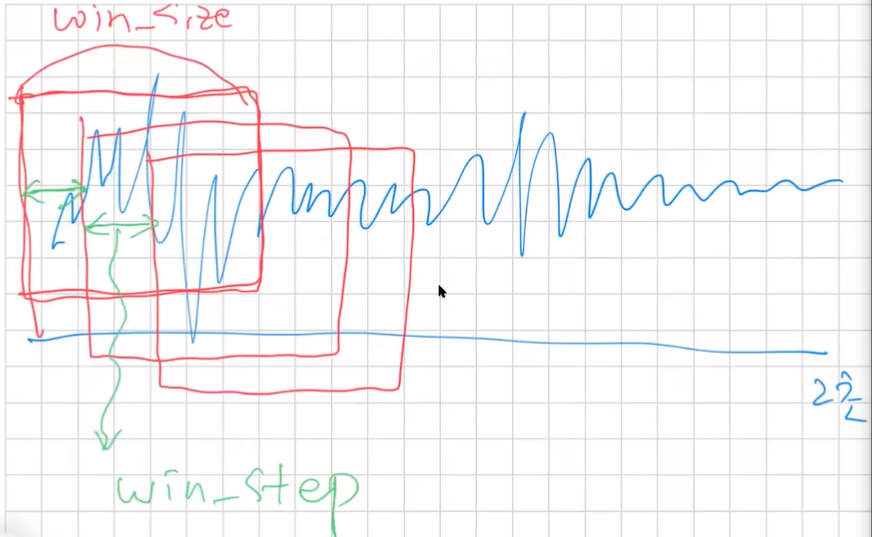

In [11]:
def frame_signal(signal, srate, win_size, win_step):  
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

### Load a wav file and frame signal

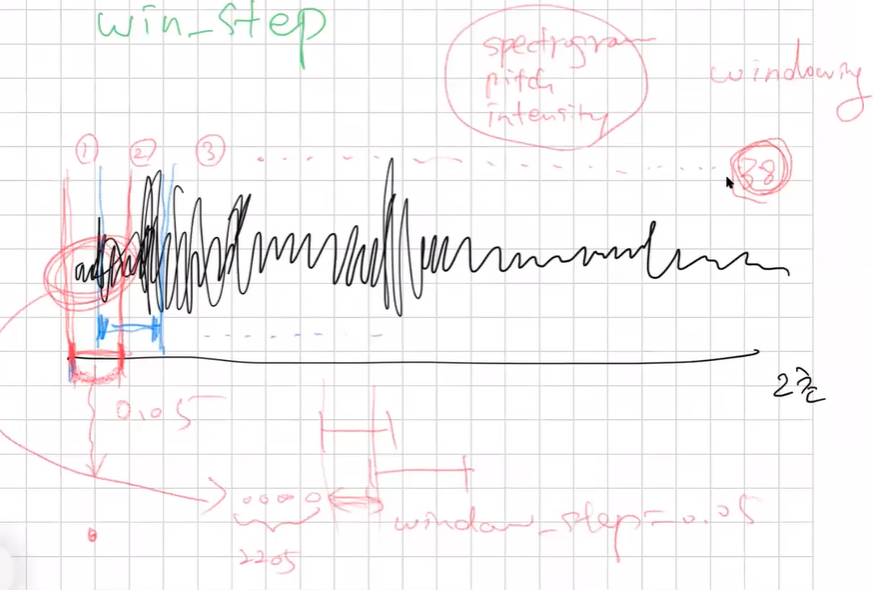

In [12]:
from scipy.io import wavfile
sr, s = wavfile.read('a.wav')
#sampling rate와 signal불려옴

s = s/np.max(np.abs(s))   #s/최댓값(절대값)#모든 것 -1~1사이로 만들어라=normalize
t = np.arange(1, len(s)+1)/sr   #signal의 개수만큼 시간을 만들어줌

win_size = 0.05
win_step = 0.05

frames = frame_signal(s, sr, win_size, win_step)    #위에서 정의한 함수를 따라#0.05초, 0.05초
framesT = np.arange(frames.shape[0]) * win_step + win_size/2    #38개 frame/window 만들어짐
#0~38 * 0.05초 = 시간

ipd.Audio(s, rate=sr)

### Intensity by RMS

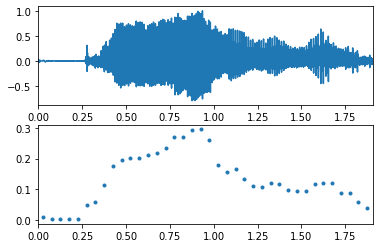

In [ ]:
amp = []
for frame in frames:
  amp.append(np.sqrt(np.mean(frame**2)))

plt.subplot(2,1,1)
plt.plot(t, s)
plt.xlim([0, t[-1]])
plt.subplot(2,1,2)
plt.plot(framesT, amp, '.')
plt.xlim([0, t[-1]])
plt.show()

### Pitch by autocorrelation

시험 제외

In [ ]:
def autocorr(s):
    result = np.correlate(s, s, mode='full')
    maxID = np.argmax(result)
    return result[maxID:]/result[maxID]

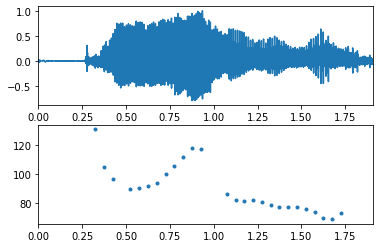

In [ ]:
F0 = []
for frame in frames:
  result = autocorr(frame)
  peakIdx = np.argmin(result) + np.argmax(result[np.argmin(result):])
  if result[peakIdx] >= 0.5:
    F0.append(1/(peakIdx/sr))
  else:
    F0.append(np.nan)

plt.subplot(2,1,1)
plt.plot(t, s)
plt.xlim([0, t[-1]])
plt.subplot(2,1,2)
plt.plot(framesT, F0, '.')
plt.xlim([0, t[-1]])
plt.show()

### Play musical notes

In [ ]:
def getFrequency(note):
    A4=440
    notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

    octave = int(note[2]) if len(note) == 3 else int(note[1])
        
    keyNumber = notes.index(note[0:-1]);
    
    if (keyNumber < 3) :
        keyNumber = keyNumber + 12 + ((octave - 1) * 12) + 1; 
    else:
        keyNumber = keyNumber + ((octave - 1) * 12) + 1; 

    return A4 * 2** ((keyNumber- 49) / 12)

In [ ]:
amp = 1; sr = 10000; phase = 0

A4  = getFrequency('A4')
C5  = getFrequency('C5')
F5  = getFrequency('F5')
D5  = getFrequency('D5')
E5  = getFrequency('E5')	 
Eb5 = getFrequency('D#5') 
F5  = getFrequency('F5') 
G5  = getFrequency('G5')
Bb5 = getFrequency('A#5')
D6 = getFrequency('D6')

In [ ]:
# The bridge on the river Kwai

notes = [F5, D5, 0, D5, Eb5, F5, D6, 0, D6, 0, Bb5, 0, \
         F5, D5, 0, D5, Eb5, D5, F5, 0, F5, 0, Eb5, 0, \
         Eb5, C5, 0, C5, D5, Eb5, F5, D5, 0, D5, E5, D5, \
         C5, F5, D5, E5, C5, G5, F5]

durs = [0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, \
        0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, \
        0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, 0.25, 0.25, 0.25, \
        0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 1.5]

In [ ]:
s_all = np.empty(0)

for note, dur in zip(notes, durs):    #두개를 zip으로 묶기
  s, t, th= phasor_sine(amp, sr, dur, note, phase)
  s_all = np.concatenate((s_all, s))

In [ ]:
ipd.Audio(s_all, rate=sr)